# 识别接触背景的标签
在发育生物学中，区分细胞层（例如在上皮组织中）是一项常见任务。因此，了解一个细胞是否是外层的一部分，是否接触背景可能会很有用。在这个笔记本中，我们将测量并可视化这一点。

为了演示，我们将模拟一团细胞。

In [1]:
import pyclesperanto_prototype as cle

# import a function from a file in the same folder
from simulated_cell_clumb import simulate_data

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
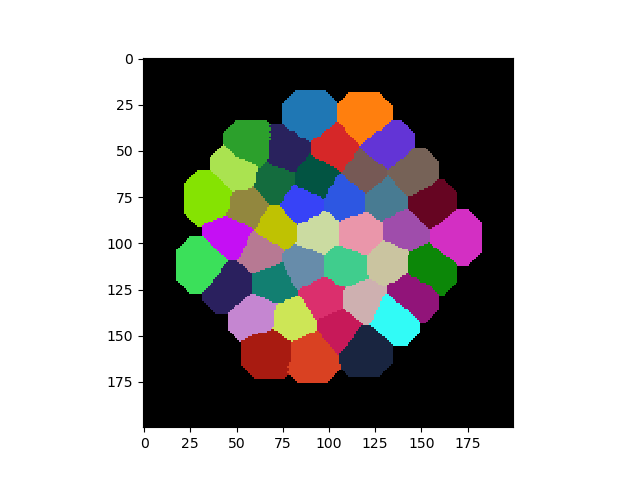

In [2]:
cells = simulate_data()
cells

## 确定哪些细胞接触背景
为了确定哪些细胞接触背景，我们需要生成一个接触矩阵，告诉我们哪些对象接触其他对象。

cl.OCLArray([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.]], dtype=float32)
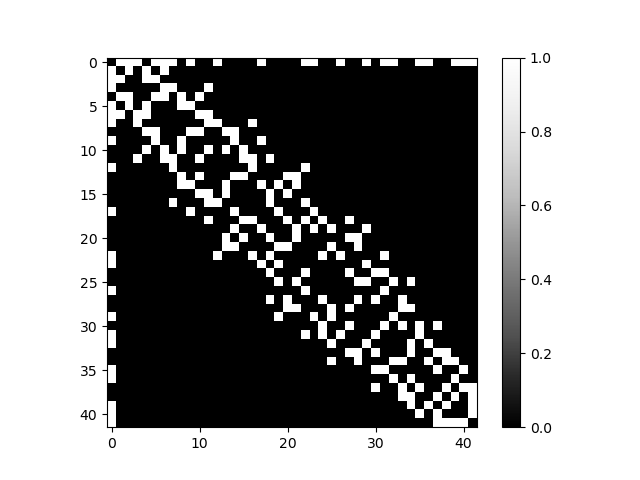
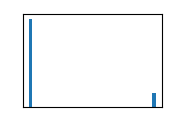

In [3]:
touch_matrix = cle.generate_touch_matrix(cells)
touch_matrix

这个图像中的第一行和第一列代表接触背景的对象。我们可以像这样读取这第一行或列：

In [4]:
touching_background = touch_matrix[0]
touching_background

cl.OCLArray([0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1.], dtype=float32)

我们可以在原始图像坐标中将其可视化。

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
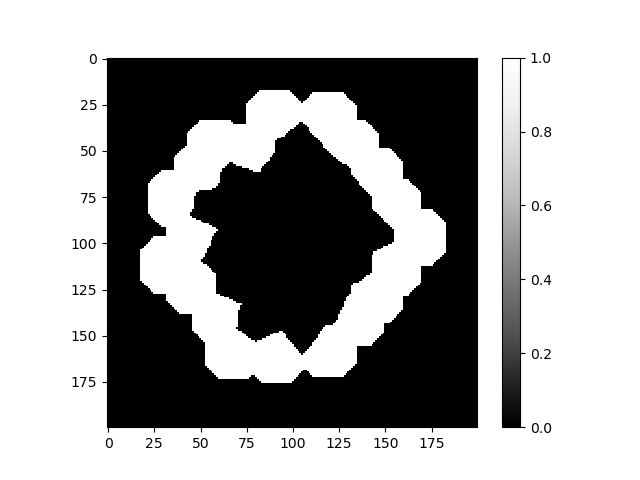
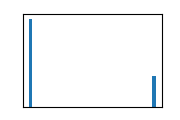

In [5]:
cle.replace_intensities(cells, touching_background)

或者我们可以获得一个代表这些对象的标签图像。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
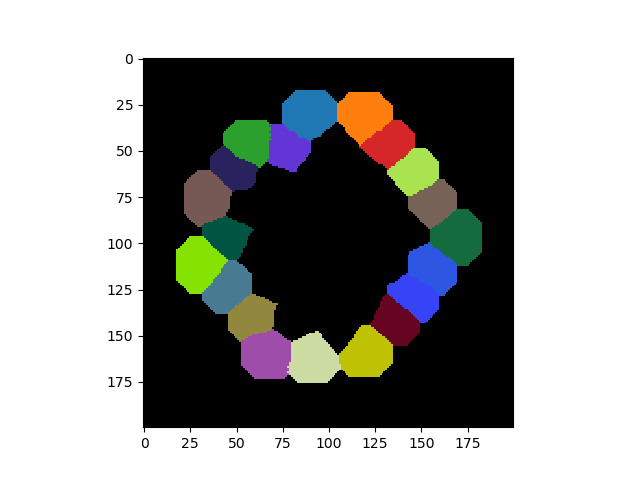

In [6]:
cle.exclude_labels(cle.binary_not([touching_background]), cells)